In [127]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


LOADING THE DATA

In [128]:
tour_df = pd.read_csv('/content/tour_logs_train.csv')
test_df = pd.read_csv('/content/tour_logs_test_input.csv')

In [129]:
tour_df.head()

,Gig_ID,Venue_ID,Show_DateTime,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Weather,Moon_Phase,Band_Outfit,Merch_Sales_Post_Show,Crowd_Energy
0,Gig_0000,V_Alpha,07-03-2024 21:00,3,5.0,52.93,464.0,2,Rainy,Waning Crescent,Leather,916,64.96
1,Gig_0001,V_Beta,05-09-2024 22:00,3,2.0,66.33,388.0,5,Clear,New Moon,Leather,1003,66.42
2,Gig_0002,V_Delta,09-03-2024 15:00,5,1.0,51.37,679.0,1,Rainy,Waning Crescent,Denim,720,42.58
3,Gig_0003,V_Beta,08-07-2024 08:00,0,10.0,64.77,454.0,1,Rainy,New Moon,Leather,0,0.00
4,Gig_0004,V_Delta,26-04-2024 17:00,4,8.0,47.34,654.0,5,Cloudy,Full Moon,Spandex,950,67.55


In [130]:
test_df.head()

,Gig_ID,Venue_ID,Show_DateTime,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Weather,Moon_Phase,Band_Outfit,Merch_Sales_Post_Show
0,Gig_0000,V_Alpha,2024-05-08 16:00:00,2,2.0,69.96,747.0,4,Cloudy,New Moon,Velvet,807
1,Gig_0001,V_Alpha,2024-03-10 16:00:00,6,NaN,44.82,541.0,5,Cloudy,New Moon,Spandex,702
2,Gig_0002,V_Alpha,2024-04-10 22:00:00,2,3.0,40.96,636.0,3,Cloudy,New Moon,Leather,467
3,Gig_0003,V_Beta,11/04/2024 07:00 AM,3,1.0,50.70,655.0,4,Clear,New Moon,Denim,0
4,Gig_0004,V_Delta,2024-03-18 17:00:00,0,1.0,15.61,587.0,3,Stormy,First Quarter,Denim,832


In [131]:
print(f'Number of Rows in {tour_df.shape[0]}')
print(f'Number of Columns in {tour_df.shape[1]}')

Number of Rows in 2000
Number of Columns in 13


In [132]:
print(f'Number of Rows in {test_df.shape[0]}')
print(f'Number of Columns in {test_df.shape[1]}')

Number of Rows in 500
Number of Columns in 12


In [133]:
tour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gig_ID                 2000 non-null   object 
 1   Venue_ID               2000 non-null   object 
 2   Show_DateTime          2000 non-null   object 
 3   Day_of_Week            2000 non-null   int64  
 4   Volume_Level           1819 non-null   float64
 5   Ticket_Price           2000 non-null   object 
 6   Crowd_Size             1960 non-null   float64
 7   Opener_Rating          2000 non-null   int64  
 8   Weather                2000 non-null   object 
 9   Moon_Phase             2000 non-null   object 
 10  Band_Outfit            2000 non-null   object 
 11  Merch_Sales_Post_Show  2000 non-null   int64  
 12  Crowd_Energy           2000 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 203.3+ KB


In [134]:
tour_df.duplicated().sum()

np.int64(0)

In [135]:
test_df.duplicated().sum()

np.int64(0)

In [136]:
tour_df.isnull().sum()

,0
Gig_ID,0
Venue_ID,0
Show_DateTime,0
Day_of_Week,0
Volume_Level,181
Ticket_Price,0
Crowd_Size,40
Opener_Rating,0
Weather,0
Moon_Phase,0


In [137]:
test_df.isnull().sum()

,0
Gig_ID,0
Venue_ID,0
Show_DateTime,0
Day_of_Week,0
Volume_Level,42
Ticket_Price,0
Crowd_Size,11
Opener_Rating,0
Weather,0
Moon_Phase,0


DATA CLEANING

In [138]:
import re
fix_symbols = {
    'Â£': 'GBP',
    'â‚¬': 'EUR',
    '£': 'GBP',
    '$': 'USD',
    'USD': 'USD'
}

rates = {'USD': 1.0, 'GBP': 1.27, 'EUR': 1.09}

def clean_complex_ticket(text):
    if pd.isna(text) or str(text).upper() == 'FREE':
        return None

    text = str(text).strip()
    first_part = text.split('(')[0].strip()

    number_match = re.search(r'(\d+[\.,]\d+|\d+)', first_part)
    if not number_match:
        return None

    amount = float(number_match.group(1).replace(',', ''))


    currency = 'USD'
    for key, code in fix_symbols.items():
        if key in text:
            currency = code
            break

    return round(amount * rates.get(currency, 1.0), 2)

tour_df = tour_df[tour_df['Ticket_Price'].str.upper() != 'FREE'].copy()
tour_df['Standard_Price_USD'] = tour_df['Ticket_Price'].apply(clean_complex_ticket)

test_df = test_df[test_df['Ticket_Price'].str.upper() != 'FREE'].copy()
test_df['Standard_Price_USD'] = test_df['Ticket_Price'].apply(clean_complex_ticket)


In [139]:

from datetime import datetime

# Function to determine season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Autumn'

# Function to determine time of day based on hour
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:  # 22-23 and 0-4
        return 'Late Night'


tour_df['Show_DateTime'] = pd.to_datetime(tour_df['Show_DateTime'], format='mixed', dayfirst=True, errors='coerce')
test_df['Show_DateTime'] = pd.to_datetime(tour_df['Show_DateTime'], format='mixed', dayfirst=True, errors='coerce')


tour_df['season'] = tour_df['Show_DateTime'].dt.month.apply(get_season)
tour_df['time_of_day'] = tour_df['Show_DateTime'].dt.hour.apply(get_time_of_day)

test_df['season'] = test_df['Show_DateTime'].dt.month.apply(get_season)
test_df['time_of_day'] = test_df['Show_DateTime'].dt.hour.apply(get_time_of_day)


print(tour_df[['Show_DateTime', 'season', 'time_of_day']])
print(test_df[['Show_DateTime', 'season', 'time_of_day']])

           Show_DateTime  season time_of_day
0    2024-03-07 21:00:00  Spring     Evening
1    2024-09-05 22:00:00  Autumn  Late Night
2    2024-03-09 15:00:00  Spring   Afternoon
3    2024-07-08 08:00:00  Summer     Morning
4    2024-04-26 17:00:00  Spring     Evening
...                  ...     ...         ...
1995 2024-06-16 20:00:00  Summer     Evening
1996 2024-05-23 23:00:00  Spring  Late Night
1997                 NaT  Autumn  Late Night
1998 2024-05-28 00:00:00  Spring  Late Night
1999 2024-08-21 19:00:00  Summer     Evening

[1953 rows x 3 columns]
          Show_DateTime  season time_of_day
0   2024-03-07 21:00:00  Spring     Evening
1   2024-09-05 22:00:00  Autumn  Late Night
2   2024-03-09 15:00:00  Spring   Afternoon
3   2024-07-08 08:00:00  Summer     Morning
4   2024-04-26 17:00:00  Spring     Evening
..                  ...     ...         ...
495 2024-04-25 20:00:00  Spring     Evening
496 2024-08-16 21:00:00  Summer     Evening
497 2024-03-04 21:00:00  Spring     Eve

In [140]:
test_df = test_df.dropna()
tour_df = tour_df.dropna()


In [141]:
test_df.isnull().sum()

,0
Gig_ID,0
Venue_ID,0
Show_DateTime,0
Day_of_Week,0
Volume_Level,0
Ticket_Price,0
Crowd_Size,0
Opener_Rating,0
Weather,0
Moon_Phase,0


In [142]:
tour_df.isnull().sum()


,0
Gig_ID,0
Venue_ID,0
Show_DateTime,0
Day_of_Week,0
Volume_Level,0
Ticket_Price,0
Crowd_Size,0
Opener_Rating,0
Weather,0
Moon_Phase,0


In [143]:
tour_df = tour_df.drop('Moon_Phase', axis=1)
test_df = test_df.drop('Moon_Phase', axis = 1)

In [144]:
tour_df = tour_df.drop('Ticket_Price', axis=1)
test_df = test_df.drop('Ticket_Price', axis=1)

In [145]:
tour_df= tour_df.drop('Show_DateTime', axis=1)
test_df = test_df.drop('Show_DateTime', axis=1)

EXPLORATORY DATA ANALYSIS

Venue_ID
V_Gamma    70.879976
V_Delta    57.443940
V_Alpha    55.201914
V_Beta     40.331224
Name: Crowd_Energy, dtype: float64


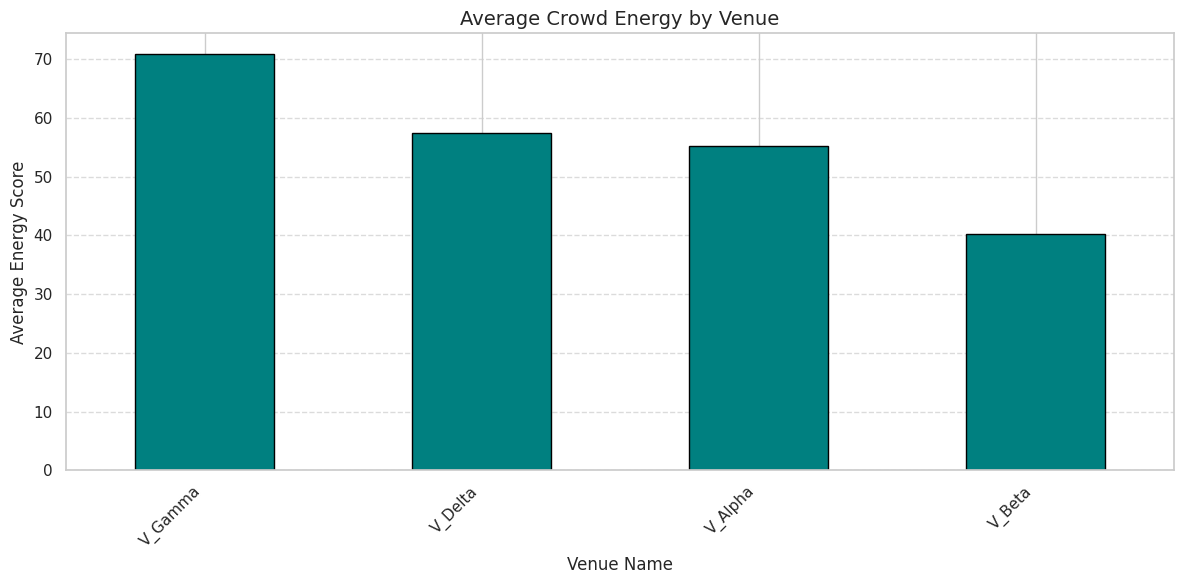

In [146]:


avg_energy = tour_df.groupby('Venue_ID')['Crowd_Energy'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_energy.plot(kind='bar', color='teal', edgecolor='black')


plt.title('Average Crowd Energy by Venue', fontsize=14)
plt.xlabel('Venue Name', fontsize=12)
plt.ylabel('Average Energy Score', fontsize=12)


plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


print(avg_energy)

In [147]:

tour_df = tour_df[tour_df['Standard_Price_USD'] < 150]


tour_df = tour_df[tour_df['Crowd_Energy'] <= 100]

tour_df = tour_df[tour_df['Crowd_Size'] < 1500]

tour_df = tour_df[(tour_df['Volume_Level'] < 20) & (tour_df['Volume_Level'] > 0)]

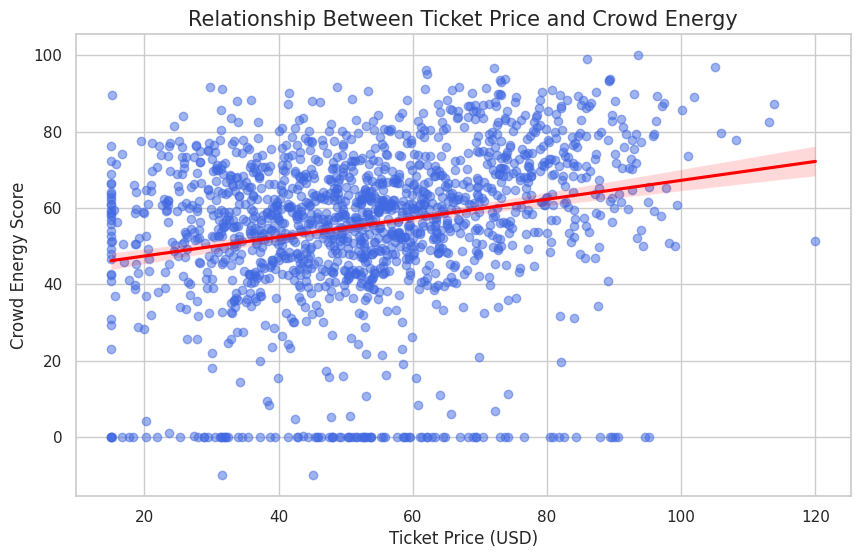

In [148]:

import seaborn as sns


sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.regplot(data=tour_df,
            x='Standard_Price_USD',
            y='Crowd_Energy',
            scatter_kws={'alpha':0.5, 'color':'royalblue'},
            line_kws={'color':'red'})

plt.title('Relationship Between Ticket Price and Crowd Energy', fontsize=15)
plt.xlabel('Ticket Price (USD)', fontsize=12)
plt.ylabel('Crowd Energy Score', fontsize=12)

plt.show()

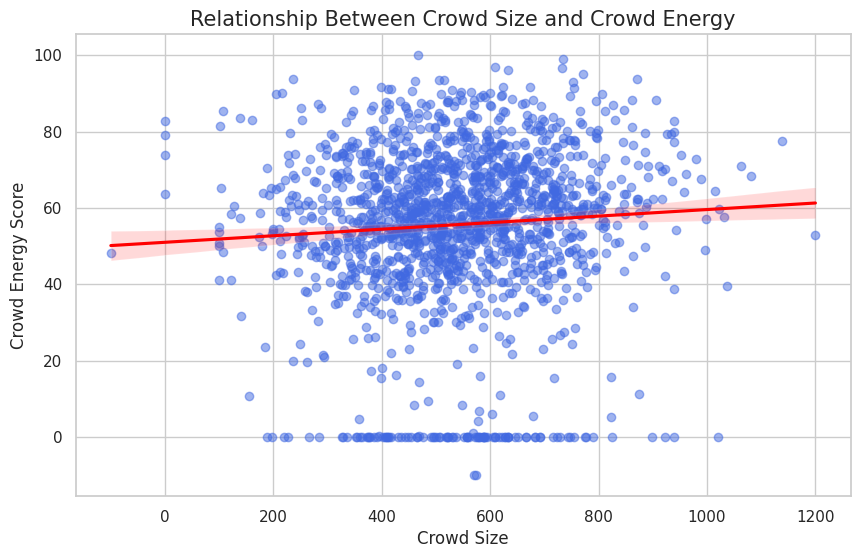

In [149]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))


sns.regplot(data=tour_df,
            x='Crowd_Size',
            y='Crowd_Energy',
            scatter_kws={'alpha':0.5, 'color':'royalblue'},
            line_kws={'color':'red'})


plt.title('Relationship Between Crowd Size and Crowd Energy', fontsize=15)
plt.xlabel('Crowd Size', fontsize=12)
plt.ylabel('Crowd Energy Score', fontsize=12)

plt.show()

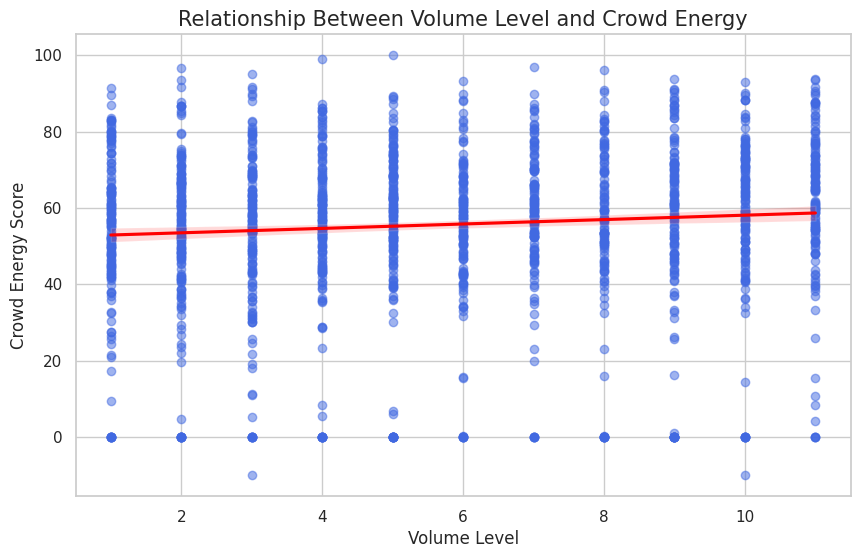

In [150]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.regplot(data=tour_df,
            x='Volume_Level',
            y='Crowd_Energy',
            scatter_kws={'alpha':0.5, 'color':'royalblue'},
            line_kws={'color':'red'})


plt.title('Relationship Between Volume Level and Crowd Energy', fontsize=15)
plt.xlabel('Volume Level', fontsize=12)
plt.ylabel('Crowd Energy Score', fontsize=12)

plt.show()

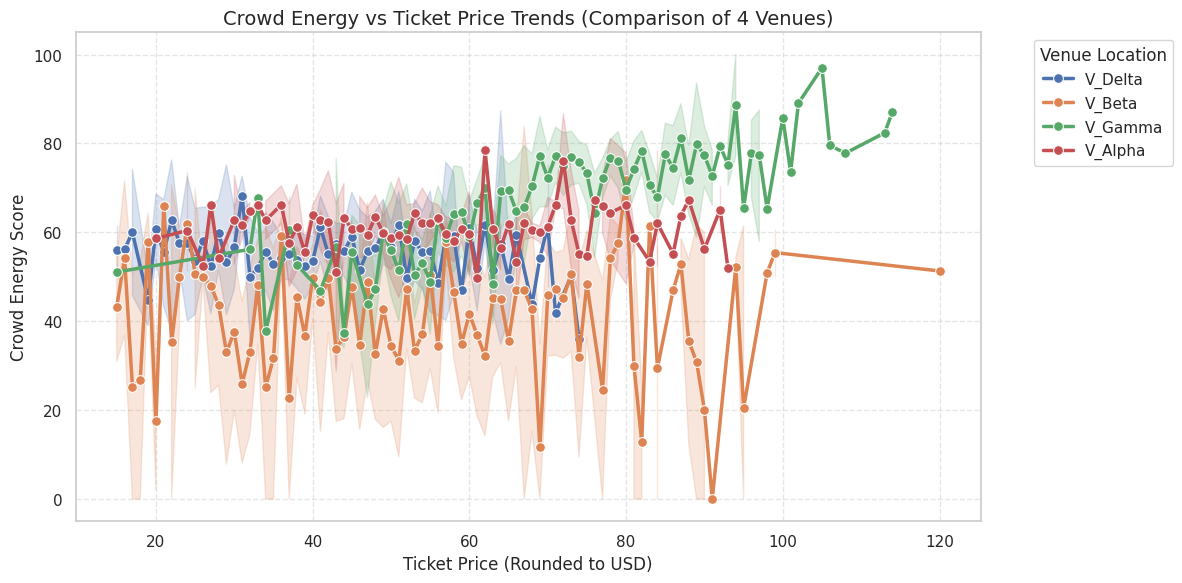

In [151]:



tour_df['Price_Group'] = tour_df['Standard_Price_USD'].round(0)


plot_df = tour_df.sort_values('Price_Group')


plt.figure(figsize=(12, 6))


sns.lineplot(data=plot_df,
             x='Price_Group',
             y='Crowd_Energy',
             hue='Venue_ID',
             marker='o',
             markersize=7,
             linewidth=2.5)


plt.title('Crowd Energy vs Ticket Price Trends (Comparison of 4 Venues)', fontsize=14)
plt.xlabel('Ticket Price (Rounded to USD)', fontsize=12)
plt.ylabel('Crowd Energy Score', fontsize=12)


plt.legend(title='Venue Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
tour_df= tour_df.drop('Price_Group', axis=1)

plt.show()

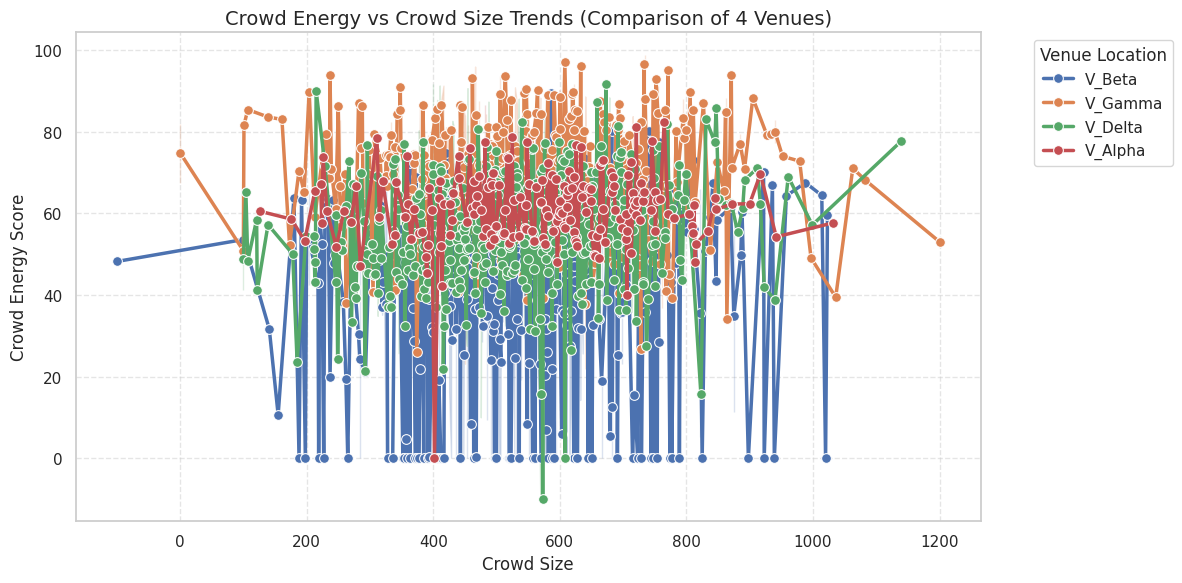

In [152]:
tour_df['Size_Group'] = tour_df['Crowd_Size'].round(0)


plot_df = tour_df.sort_values('Size_Group')


plt.figure(figsize=(12, 6))


sns.lineplot(data=plot_df,
             x='Size_Group',
             y='Crowd_Energy',
             hue='Venue_ID',
             marker='o',
             markersize=7,
             linewidth=2.5)


plt.title('Crowd Energy vs Crowd Size Trends (Comparison of 4 Venues)', fontsize=14)
plt.xlabel('Crowd Size', fontsize=12)
plt.ylabel('Crowd Energy Score', fontsize=12)


plt.legend(title='Venue Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
tour_df= tour_df.drop('Size_Group', axis=1)

plt.show()

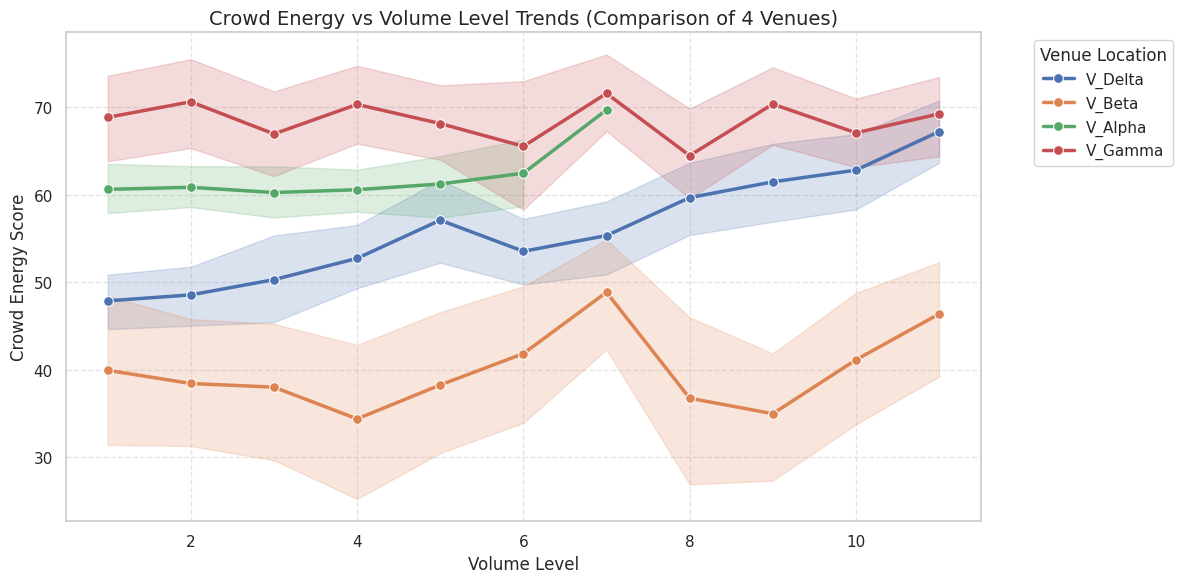

In [153]:
tour_df['Voice_Group'] = tour_df['Volume_Level'].round(0)


plot_df = tour_df.sort_values('Voice_Group')


plt.figure(figsize=(12, 6))


sns.lineplot(data=plot_df,
             x='Voice_Group',
             y='Crowd_Energy',
             hue='Venue_ID',
             marker='o',
             markersize=7,
             linewidth=2.5)


plt.title('Crowd Energy vs Volume Level Trends (Comparison of 4 Venues)', fontsize=14)
plt.xlabel('Volume Level', fontsize=12)
plt.ylabel('Crowd Energy Score', fontsize=12)


plt.legend(title='Venue Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
tour_df= tour_df.drop('Voice_Group', axis=1)

plt.show()

season
Spring    55.989839
Summer    55.606963
Autumn    55.287987
Winter    34.161111
Name: Crowd_Energy, dtype: float64


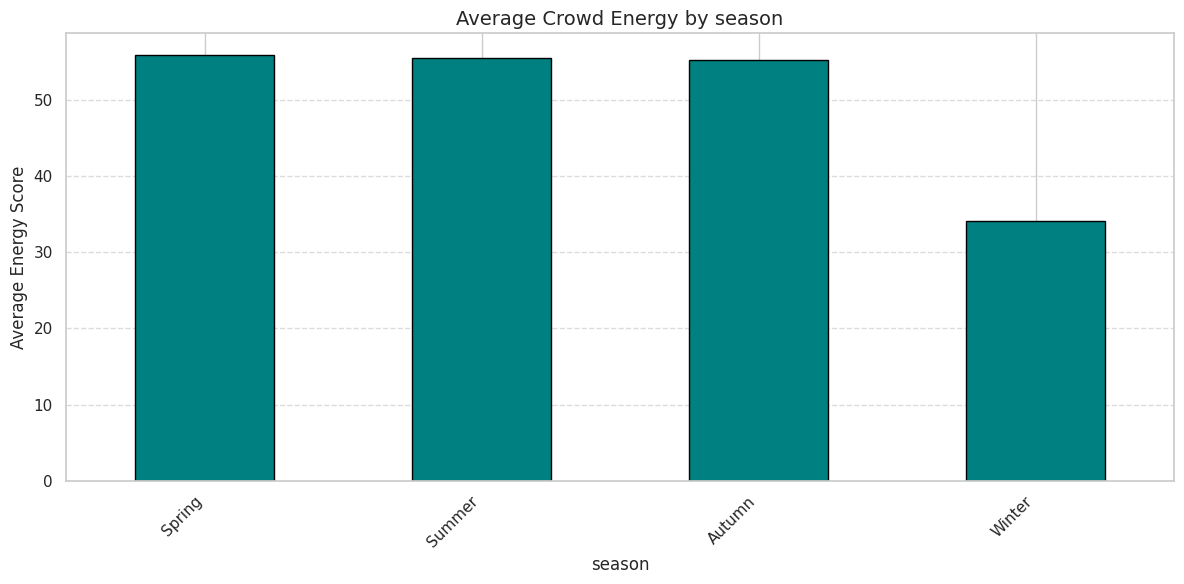

In [154]:
avg_energy = tour_df.groupby('season')['Crowd_Energy'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_energy.plot(kind='bar', color='teal', edgecolor='black')


plt.title('Average Crowd Energy by season', fontsize=14)
plt.xlabel('season', fontsize=12)
plt.ylabel('Average Energy Score', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


print(avg_energy)

Opener_Rating
5    58.709817
4    57.253208
3    56.799436
2    54.428343
1    50.867683
Name: Crowd_Energy, dtype: float64


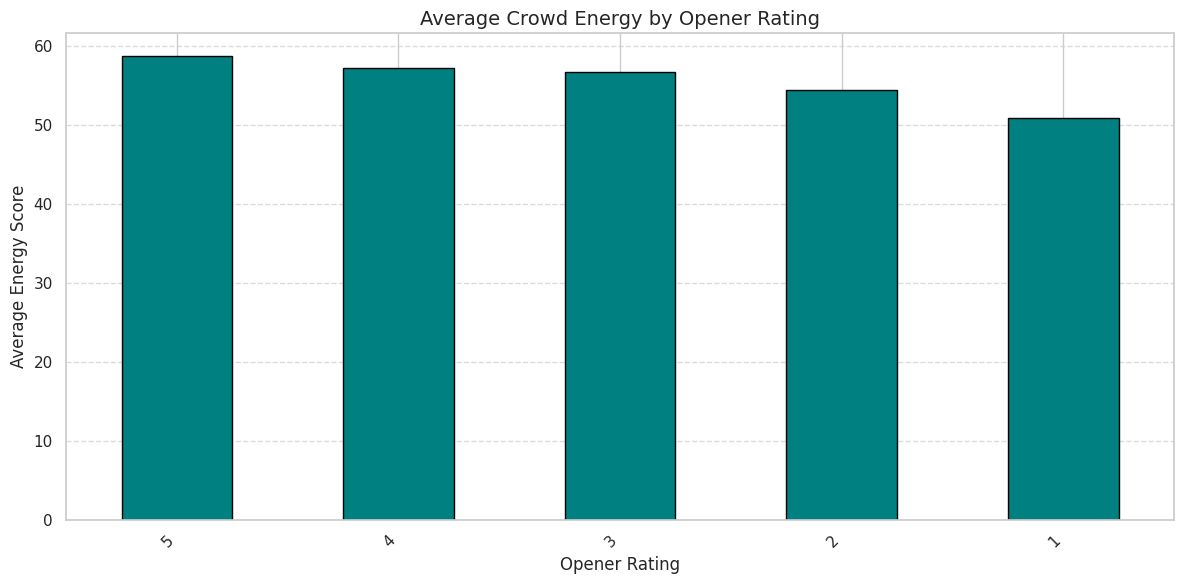

In [155]:
avg_energy = tour_df.groupby('Opener_Rating')['Crowd_Energy'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_energy.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Average Crowd Energy by Opener Rating', fontsize=14)
plt.xlabel('Opener Rating', fontsize=12)
plt.ylabel('Average Energy Score', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

print(avg_energy)

time_of_day
Evening       59.628017
Late Night    56.264851
Afternoon     55.670200
Morning        3.159714
Name: Crowd_Energy, dtype: float64


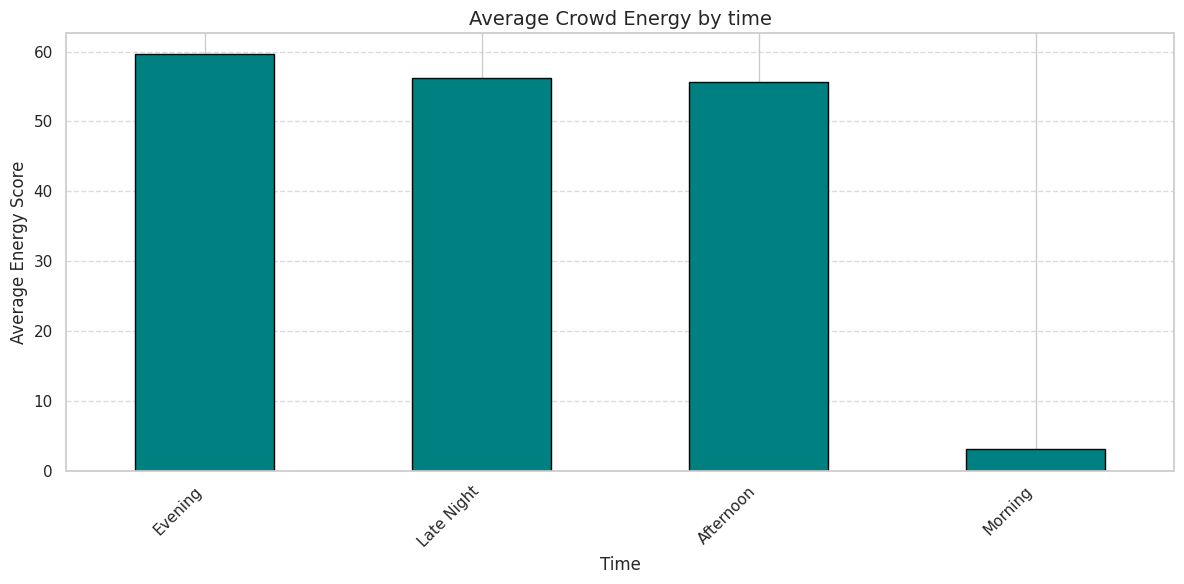

In [156]:
avg_energy = tour_df.groupby('time_of_day')['Crowd_Energy'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_energy.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Average Crowd Energy by time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average Energy Score', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

print(avg_energy)

Day_of_Week
6    60.694286
5    58.455822
1    55.640083
3    54.534045
0    54.135466
2    53.435226
4    52.480949
Name: Crowd_Energy, dtype: float64


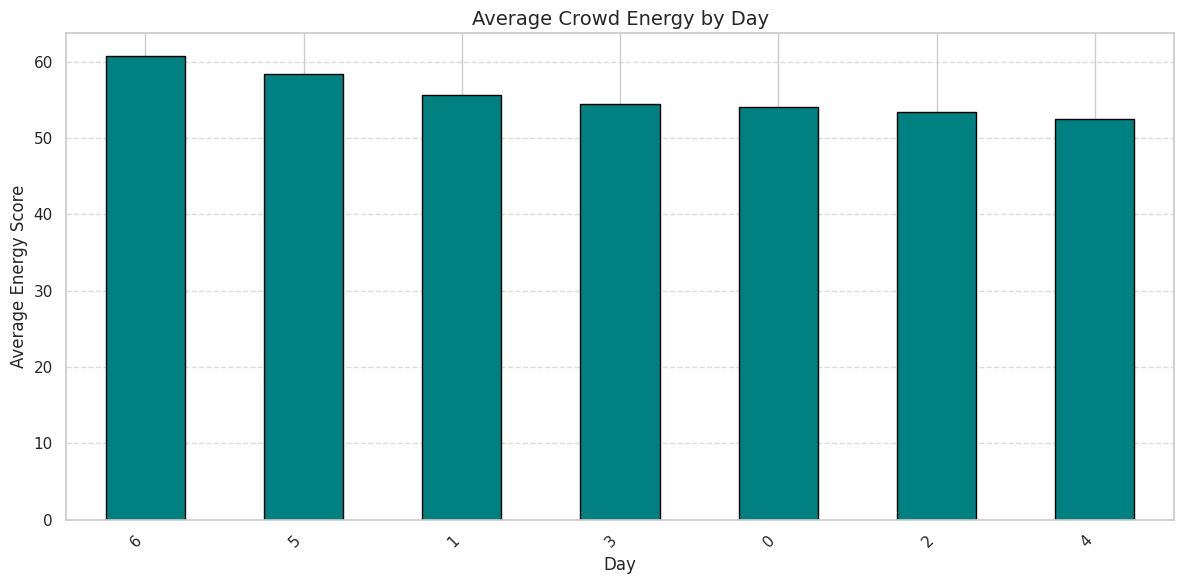

In [157]:
avg_energy = tour_df.groupby('Day_of_Week')['Crowd_Energy'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_energy.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Average Crowd Energy by Day', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Energy Score', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

print(avg_energy)

Band_Outfit
Spandex    56.100054
Leather    55.494523
Denim      55.447943
Name: Crowd_Energy, dtype: float64


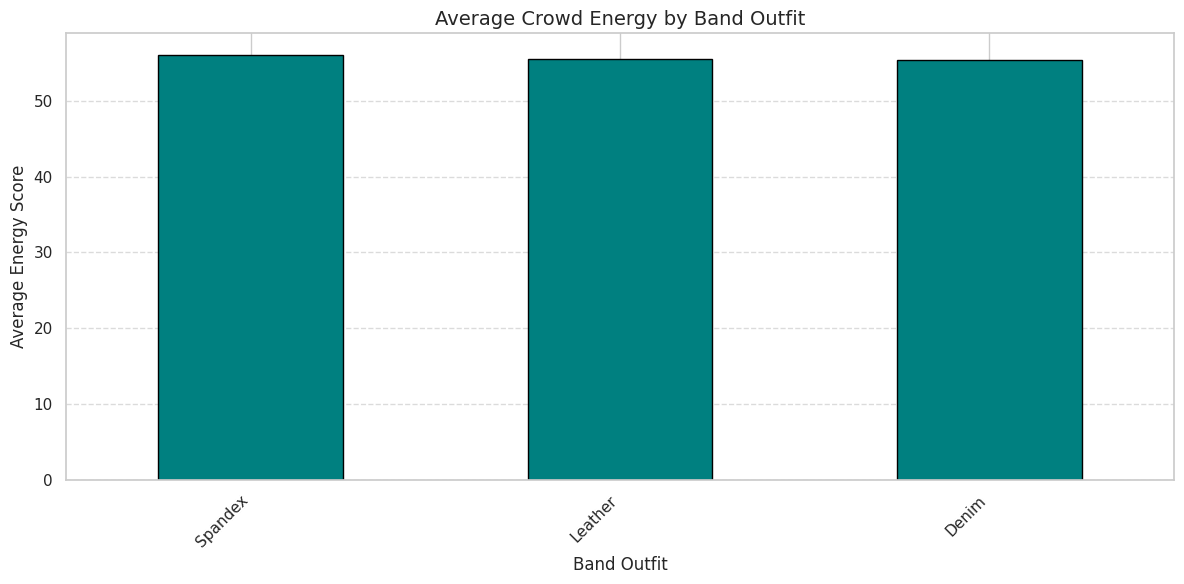

In [158]:
avg_energy = tour_df.groupby('Band_Outfit')['Crowd_Energy'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_energy.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Average Crowd Energy by Band Outfit', fontsize=14)
plt.xlabel('Band Outfit', fontsize=12)
plt.ylabel('Average Energy Score', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

print(avg_energy)

Weather
Cloudy    57.142902
Clear     56.520336
Rainy     55.930539
Stormy    53.105566
Name: Crowd_Energy, dtype: float64


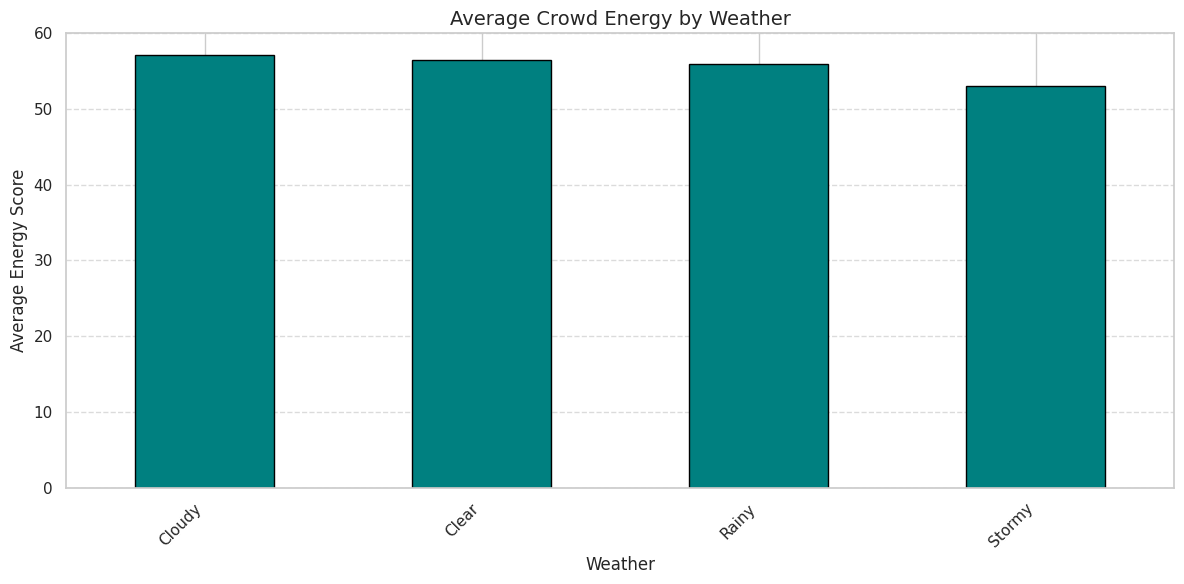

In [159]:
avg_energy = tour_df.groupby('Weather')['Crowd_Energy'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_energy.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Average Crowd Energy by Weather', fontsize=14)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Average Energy Score', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

print(avg_energy)

In [160]:

corr_matrix = tour_df.corr(numeric_only=True)


energy_corr = corr_matrix['Crowd_Energy'].sort_values(ascending=False)

print("Correlation with Crowd Energy:")
print(energy_corr)

Correlation with Crowd Energy:
Crowd_Energy             1.000000
Merch_Sales_Post_Show    0.936064
Standard_Price_USD       0.229696
Opener_Rating            0.124828
Volume_Level             0.088154
Day_of_Week              0.081181
Crowd_Size               0.069694
Name: Crowd_Energy, dtype: float64


In [161]:
print(tour_df.shape)
print(test_df.shape)

(1605, 13)
(419, 12)


SPLITTING TRAINING AND VALIDATION DATA

In [162]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(tour_df, test_size=0.2, random_state=42)


FEATURE ENGINEERING

In [163]:
train_fe = train_data.copy()
train_fe['merch_per_person'] = train_fe['Merch_Sales_Post_Show'] / (train_fe['Crowd_Size']+1)

train_fe['price_group'] = pd.cut(train_fe['Standard_Price_USD'],
                                  bins=[0, 40, 60, 80, 150],
                                  labels=['low', 'medium', 'high', 'vip'])
train_fe['revenue'] = train_fe['Standard_Price_USD'] * train_fe['Crowd_Size']

median_crowd = train_fe['Crowd_Size'].median()
train_fe['big_crowd'] = (train_fe['Crowd_Size'] > median_crowd).astype(int)

train_fe['price_crowd'] = train_fe['Standard_Price_USD'] * train_fe['Crowd_Size']
train_fe['volume_opener'] = train_fe['Volume_Level'] * train_fe['Opener_Rating']

train_fe['weather_season'] = train_fe['Weather'] + '_' + train_fe['season']
train_fe['weekend'] = train_fe['Day_of_Week'].isin([6, 7]).astype(int)

train_fe['evening_show'] = train_fe['time_of_day'].isin(['Evening', 'Late Night']).astype(int)

train_fe['summer_show'] = (train_fe['season'] == 'Summer').astype(int)

print(f"Train data shape after feature engineering: {train_fe.shape}")


Train data shape after feature engineering: (1284, 23)


In [164]:
val_fe = val_data.copy()



# Same features as train
val_fe['merch_per_person'] = val_fe['Merch_Sales_Post_Show'] / (val_fe['Crowd_Size']+1)

val_fe['price_group'] = pd.cut(val_fe['Standard_Price_USD'],
                                 bins=[0, 40, 60, 80, 150],
                                 labels=['low', 'medium', 'high', 'vip'])

val_fe['revenue'] = val_fe['Standard_Price_USD'] * val_fe['Crowd_Size']

# Using median from TRAIN data to avoid data leakage
val_fe['big_crowd'] = (val_fe['Crowd_Size'] > median_crowd).astype(int)

val_fe['price_crowd'] = val_fe['Standard_Price_USD'] * val_fe['Crowd_Size']
val_fe['volume_opener'] = val_fe['Volume_Level'] * val_fe['Opener_Rating']

val_fe['weather_season'] = val_fe['Weather'] + '_' + val_fe['season']

val_fe['weekend'] = val_fe['Day_of_Week'].isin([6, 7]).astype(int)

val_fe['evening_show'] = val_fe['time_of_day'].isin(['Evening', 'Late Night']).astype(int)

val_fe['summer_show'] = (val_fe['season'] == 'Summer').astype(int)

print(f"Validation data shape after feature engineering: {val_fe.shape}")

Validation data shape after feature engineering: (321, 23)


ENCOING THE DATA

In [165]:
y_train = train_fe['Crowd_Energy']
X_train = train_fe.drop(columns=['Crowd_Energy'])

X_train = X_train.drop(columns=['Gig_ID'])

venue_means = train_fe.groupby('Venue_ID')['Crowd_Energy'].mean().to_dict()
X_train['Venue_ID_encoded'] = X_train['Venue_ID'].map(venue_means)

outfit_means = train_fe.groupby('Band_Outfit')['Crowd_Energy'].mean().to_dict()
X_train['Band_Outfit_encoded'] = X_train['Band_Outfit'].map(outfit_means)

X_train = X_train.drop(columns=['Venue_ID','Band_Outfit'])

weather_dummies = pd.get_dummies(X_train['Weather'], prefix='Weather')
X_train = pd.concat([X_train, weather_dummies], axis=1)
X_train = X_train.drop(columns=['Weather'])

season_dummies = pd.get_dummies(X_train['season'], prefix='season')
X_train = pd.concat([X_train, season_dummies], axis=1)
X_train = X_train.drop(columns=['season'])

time_dummies = pd.get_dummies(X_train['time_of_day'], prefix='time')
X_train = pd.concat([X_train, time_dummies], axis=1)
X_train = X_train.drop(columns=['time_of_day'])

price_dummies = pd.get_dummies(X_train['price_group'], prefix='price_group')
X_train = pd.concat([X_train, price_dummies], axis=1)
X_train = X_train.drop(columns=['price_group'])

le_weather_season = LabelEncoder()
X_train['weather_season_le'] = le_weather_season.fit_transform(X_train['weather_season'])
X_train = X_train.drop(columns=['weather_season'])

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Converting {col} to numeric")
        X_train[col] = pd.factorize(X_train[col])[0]

print(f"Train data shape after encoding: {X_train.shape}")

Train data shape after encoding: (1284, 33)


In [166]:

y_val = val_fe['Crowd_Energy']
X_val = val_fe.drop(columns=['Crowd_Energy'])

X_val = X_val.drop(columns=['Gig_ID'])

venue_global_mean = np.mean(list(venue_means.values()))
X_val['Venue_ID_encoded'] = X_val['Venue_ID'].map(venue_means).fillna(venue_global_mean)


outfit_global_mean = np.mean(list(outfit_means.values()))
X_val['Band_Outfit_encoded'] = X_val['Band_Outfit'].map(outfit_means).fillna(outfit_global_mean)

X_val = X_val.drop(columns=['Venue_ID','Band_Outfit'])

weather_dummies = pd.get_dummies(X_val['Weather'], prefix='Weather')
X_val = pd.concat([X_val, weather_dummies], axis=1)
X_val = X_val.drop(columns=['Weather'])

season_dummies = pd.get_dummies(X_val['season'], prefix='season')
X_val = pd.concat([X_val, season_dummies], axis=1)
X_val = X_val.drop(columns=['season'])

time_dummies = pd.get_dummies(X_val['time_of_day'], prefix='time')
X_val = pd.concat([X_val, time_dummies], axis=1)
X_val = X_val.drop(columns=['time_of_day'])

price_dummies = pd.get_dummies(X_val['price_group'], prefix='price_group')
X_val = pd.concat([X_val, price_dummies], axis=1)
X_val = X_val.drop(columns=['price_group'])

X_val['weather_season_le'] = X_val['weather_season'].apply(
    lambda x: le_weather_season.transform([x])[0] if x in le_weather_season.classes_ else -1
)
X_val = X_val.drop(columns=['weather_season'])
for col in X_val.columns:
    if X_val[col].dtype == 'object':
        print(f"Converting {col} to numeric")
        X_val[col] = pd.factorize(X_val[col])[0]

print(f"Validation data shape after encoding: {X_val.shape}")

Validation data shape after encoding: (321, 33)


MODEL TRAINING USING LINEAR REGRESSION

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train = X_train.astype(float).replace([np.inf, -np.inf], np.nan).fillna(0)
X_val = X_val.astype(float).replace([np.inf, -np.inf], np.nan).fillna(0)


lr_model = LinearRegression()

lr_model.fit(X_train, y_train)


lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_val)

lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_val, lr_test_pred))
lr_train_mae = mean_absolute_error(y_train, lr_train_pred)
lr_test_mae = mean_absolute_error(y_val, lr_test_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_val, lr_test_pred)

print("\nLinear Regression Results:")
print(f"Train - RMSE: {lr_train_rmse:.2f}, MAE: {lr_train_mae:.2f}, R2: {lr_train_r2:.3f}")
print(f"Test  - RMSE: {lr_test_rmse:.2f}, MAE: {lr_test_mae:.2f}, R2: {lr_test_r2:.3f}")


Linear Regression Results:
Train - RMSE: 7.16, MAE: 5.15, R2: 0.880
Test  - RMSE: 6.57, MAE: 5.09, R2: 0.906


MODEL TRAINING USING RANDOM FOREST

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_val)


rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_val, rf_test_pred))
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_test_mae = mean_absolute_error(y_val, rf_test_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_val, rf_test_pred)

print("\nRandom Forest Results:")
print(f"Train - RMSE: {rf_train_rmse:.2f}, MAE: {rf_train_mae:.2f}, R2: {rf_train_r2:.3f}")
print(f"Test  - RMSE: {rf_test_rmse:.2f}, MAE: {rf_test_mae:.2f}, R2: {rf_test_r2:.3f}")



Random Forest Results:
Train - RMSE: 3.56, MAE: 2.28, R2: 0.970
Test  - RMSE: 6.50, MAE: 4.99, R2: 0.908


MODEL COMPARISON

In [169]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train_RMSE': [lr_train_rmse, rf_train_rmse],
    'Test_RMSE': [lr_test_rmse, rf_test_rmse],
    'Test_MAE': [lr_test_mae, rf_test_mae],
    'Test_R2': [lr_test_r2, rf_test_r2]
})

print(comparison.to_string(index=False))


if rf_test_rmse < lr_test_rmse:
    print("\n✓ Random Forest performs better!")
    best_model = rf_model
    best_pred = rf_test_pred
    best_name = 'Random Forest'
    improvement = lr_test_rmse - rf_test_rmse
else:
    print("\n✓ Linear Regression performs better!")
    best_model = lr_model
    best_pred = lr_test_pred
    best_name = 'Linear Regression'
    improvement = rf_test_rmse - lr_test_rmse

print(f"RMSE improvement: {improvement:.2f}")


            Model  Train_RMSE  Test_RMSE  Test_MAE  Test_R2
Linear Regression    7.164334   6.567945  5.089698 0.906113
    Random Forest    3.561574   6.501984  4.992219 0.907990

✓ Random Forest performs better!
RMSE improvement: 0.07


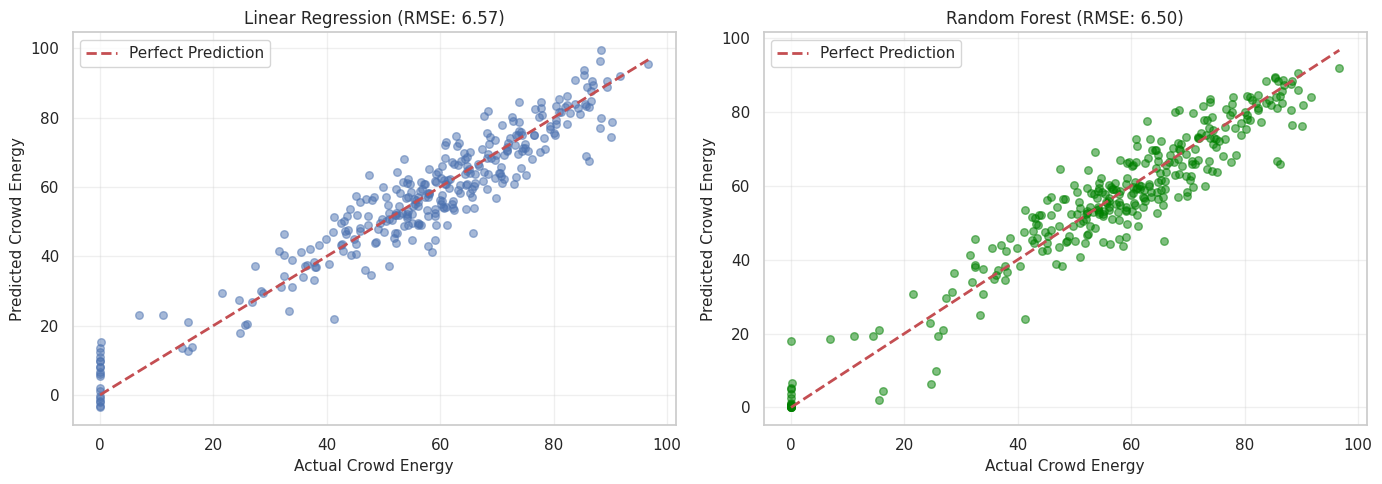

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#LR
axes[0].scatter(y_val, lr_test_pred, alpha=0.5, s=30)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Crowd Energy', fontsize=11)
axes[0].set_ylabel('Predicted Crowd Energy', fontsize=11)
axes[0].set_title(f'Linear Regression (RMSE: {lr_test_rmse:.2f})', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Random Forest
axes[1].scatter(y_val, rf_test_pred, alpha=0.5, s=30, color='green')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Crowd Energy', fontsize=11)
axes[1].set_ylabel('Predicted Crowd Energy', fontsize=11)
axes[1].set_title(f'Random Forest (RMSE: {rf_test_rmse:.2f})', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


HYPERPARAMETER TUNING

In [171]:
n_estimators_list = [100, 200, 300]
max_depth_list = [10, 20, 30]

tuning_results = []
best_tuning_rmse = float('inf')
best_params = {}

for n_est in n_estimators_list:
    for depth in max_depth_list:

        rf_temp = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=depth,
            random_state=42,
            n_jobs=-1
        )

        rf_temp.fit(X_train, y_train)
        pred = rf_temp.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, pred))

        tuning_results.append({
            'n_estimators': n_est,
            'max_depth': depth,
            'RMSE': rmse
        })

        print(f"n_estimators={n_est}, max_depth={depth:2d} -> RMSE={rmse:.2f}")

        if rmse < best_tuning_rmse:
            best_tuning_rmse = rmse
            best_params = {'n_estimators': n_est, 'max_depth': depth}

print(f"\nBest Parameters: {best_params}")
print(f"Best RMSE: {best_tuning_rmse:.2f}")


tuning_df = pd.DataFrame(tuning_results)

n_estimators=100, max_depth=10 -> RMSE=6.48
n_estimators=100, max_depth=20 -> RMSE=6.51
n_estimators=100, max_depth=30 -> RMSE=6.50
n_estimators=200, max_depth=10 -> RMSE=6.53
n_estimators=200, max_depth=20 -> RMSE=6.55
n_estimators=200, max_depth=30 -> RMSE=6.56
n_estimators=300, max_depth=10 -> RMSE=6.51
n_estimators=300, max_depth=20 -> RMSE=6.54
n_estimators=300, max_depth=30 -> RMSE=6.55

Best Parameters: {'n_estimators': 100, 'max_depth': 10}
Best RMSE: 6.48


FINAL MODEL

In [172]:
final_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y_train)

final_train_pred = final_model.predict(X_train)
final_test_pred = final_model.predict(X_val)

final_train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
final_test_rmse = np.sqrt(mean_squared_error(y_val, final_test_pred))
final_test_mae = mean_absolute_error(y_val, final_test_pred)
final_test_r2 = r2_score(y_val, final_test_pred)

print(f"\nFinal Model Performance:")
print(f"Train RMSE: {final_train_rmse:.2f}")
print(f"Test RMSE: {final_test_rmse:.2f}")
print(f"Test MAE: {final_test_mae:.2f}")
print(f"Test R2: {final_test_r2:.3f}")



Final Model Performance:
Train RMSE: 3.69
Test RMSE: 6.48
Test MAE: 4.96
Test R2: 0.908


FEATURE ENGINEERING ON TEST DATA

In [173]:
test_final = test_df.copy()

test_final['merch_per_person'] = test_final['Merch_Sales_Post_Show'] / test_final['Crowd_Size']
test_final['price_group'] = pd.cut(test_final['Standard_Price_USD'],
                                     bins=[0, 40, 60, 80, 150],
                                     labels=['low', 'medium', 'high', 'vip'])
test_final['revenue'] = test_final['Standard_Price_USD'] * test_final['Crowd_Size']
test_final['big_crowd'] = (test_final['Crowd_Size'] > median_crowd).astype(int)
test_final['price_crowd'] = test_final['Standard_Price_USD'] * test_final['Crowd_Size']
test_final['volume_opener'] = test_final['Volume_Level'] * test_final['Opener_Rating']
test_final['weather_season'] = test_final['Weather'] + '_' + test_final['season']
test_final['weekend'] = test_final['Day_of_Week'].isin([6, 7]).astype(int)
test_final['evening_show'] = test_final['time_of_day'].isin(['Evening', 'Late Night']).astype(int)
test_final['summer_show'] = (test_final['season'] == 'Summer').astype(int)

ENCODING TEST DATA

In [174]:
X_test_final = test_final.drop(columns=['Gig_ID'])

X_test_final['Venue_ID_encoded'] = X_test_final['Venue_ID'].map(venue_means).fillna(venue_global_mean)

X_test_final['Band_Outfit_encoded'] = X_test_final['Band_Outfit'].map(outfit_means).fillna(outfit_global_mean)
X_test_final = X_test_final.drop(columns=['Venue_ID','Band_Outfit'])

weather_dummies = pd.get_dummies(X_test_final['Weather'], prefix='Weather')
X_test_final = pd.concat([X_test_final, weather_dummies], axis=1)
X_test_final = X_test_final.drop(columns=['Weather'])

season_dummies = pd.get_dummies(X_test_final['season'], prefix='season')
X_test_final = pd.concat([X_test_final, season_dummies], axis=1)
X_test_final = X_test_final.drop(columns=['season'])

time_dummies = pd.get_dummies(X_test_final['time_of_day'], prefix='time')
X_test_final = pd.concat([X_test_final, time_dummies], axis=1)
X_test_final = X_test_final.drop(columns=['time_of_day'])

price_dummies = pd.get_dummies(X_test_final['price_group'], prefix='price_group')
X_test_final = pd.concat([X_test_final, price_dummies], axis=1)
X_test_final = X_test_final.drop(columns=['price_group'])

X_test_final['weather_season_le'] = X_test_final['weather_season'].apply(
    lambda x: le_weather_season.transform([x])[0] if x in le_weather_season.classes_ else -1
)
X_test_final = X_test_final.drop(columns=['weather_season'])

FINAL PREDICTION ON TEST DATA

In [175]:
X_test_final = X_test_final.astype(float).replace([np.inf, -np.inf], np.nan).fillna(0)
final_predictions = final_model.predict(X_test_final)


CREATING SUBMISSION FILE

In [176]:
submission = pd.DataFrame({
    'Gig_ID': test_df['Gig_ID'],
    'Crowd_Energy': final_predictions
})

submission.to_csv('predictions.csv', index=False)
